In [1]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

In [2]:
import h5py

In [3]:
import matplotlib
matplotlib.style.use('publication23')

In [4]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [5]:
mQ = 0.6

In [6]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
S = array(df['Q']['S'])

In [11]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=S)

In [12]:
T = 0.2

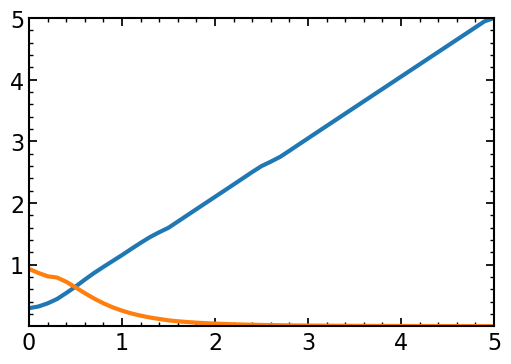

In [13]:
plt.plot(pt1.qrange, pt1.peaks)
plt.plot(pt1.qrange, pt1.widths)
# plt.ylim(0, 1)

## Debug the algorithm

In [16]:
from scipy.optimize import minimize

In [17]:
init = 0.4
sols = []
sols_rough = []
widths = []
for i, q, ge, s in zip(range(len(qrange)), qrange, pt1.Gtab.transpose(), S.transpose()):
    init = erange[argmin(imag(ge))]
    sols_rough += [init]
    # iIm = interp1d(erange, imag(ge), 'linear')
    iIm = Akima1DInterpolator(erange, imag(ge))
    iImS = Akima1DInterpolator(erange, imag(s))
    # plt.plot(erange, iIm(erange))

    # break
    x = minimize(iIm, init, bounds=[[0.9*init, 1.1*init]])
    # print(i, x.x, init, x.status)
    # init = x.x
    sols += [x.x]
    widths += [-4*iImS(init)]

NameError: name 'Akima1DInterpolator' is not defined

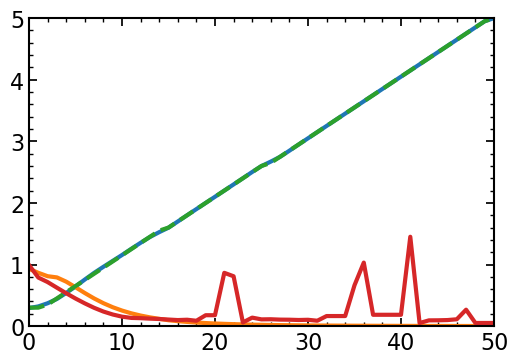

In [130]:
plt.plot(sols)
plt.plot(widths)
plt.plot(sols_rough, ls='--')
plt.ylim(0, 5)
plt.plot(pt1.widths)

In [131]:
i = 40

In [132]:
erange_dense = linspace(0, 5, 1000)

In [133]:
from scipy.interpolate import Akima1DInterpolator